<a href="https://colab.research.google.com/github/FIOWB21/Machine-learning/blob/main/%D0%9B%D0%91_2_%D0%9F%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 2
Логістична регресія

Виконав: Панченко Віталій

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files



In [2]:
uploaded = files.upload()
df = pd.read_csv('heart.csv')  # Переконайтесь, що файл знаходиться у тій же папці
df.head()  # Перегляд перших рядків


Saving heart.csv to heart.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:

print("Інформація про датасет:")
df.info()


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 

In [4]:

print("Перевірка на пропущені значення:")
print(df.isnull().sum())


Перевірка на пропущені значення:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:

print("Описова статистика:")
df.describe()


Описова статистика:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


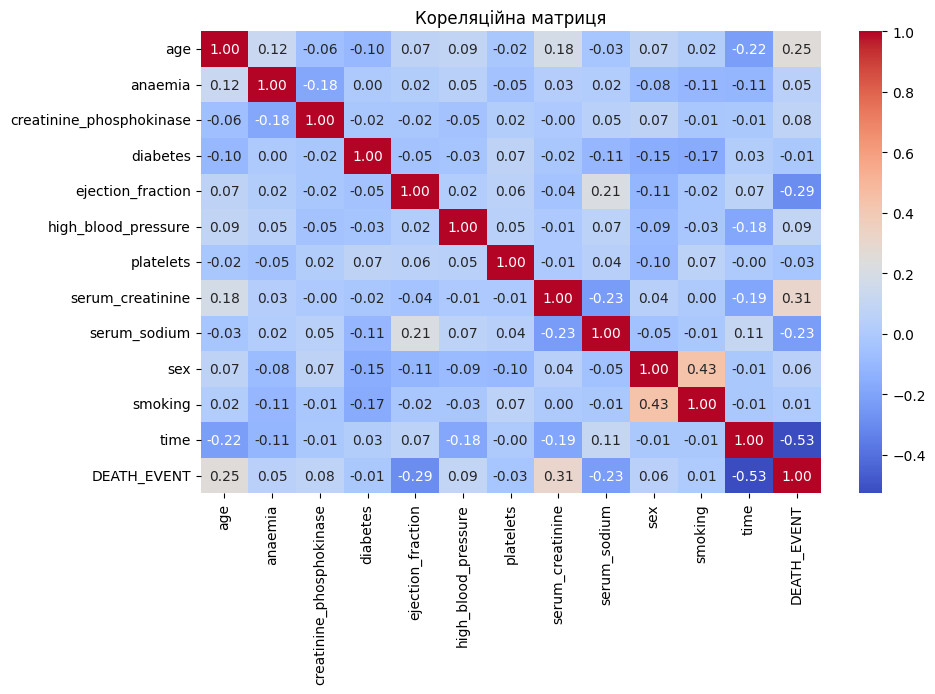

In [6]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()


In [9]:
#print(df.columns)
X = df.drop(columns=['DEATH_EVENT'])  # 'DEATH_EVENT' - цільова змінна
y = df['DEATH_EVENT']


In [19]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.4f}")
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))


Точність моделі: 0.8510

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       698
           1       0.76      0.74      0.75       302

    accuracy                           0.85      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.85      0.85      0.85      1000



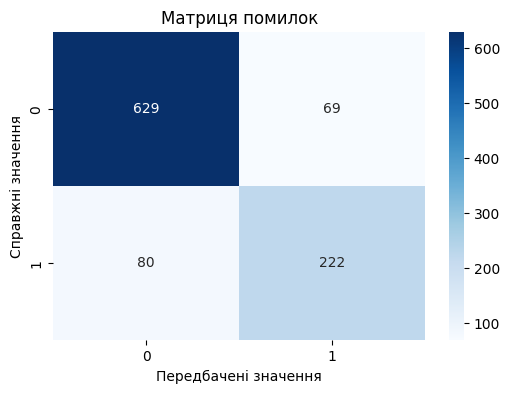

In [21]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Передбачені значення")
plt.ylabel("Справжні значення")
plt.title("Матриця помилок")
plt.show()


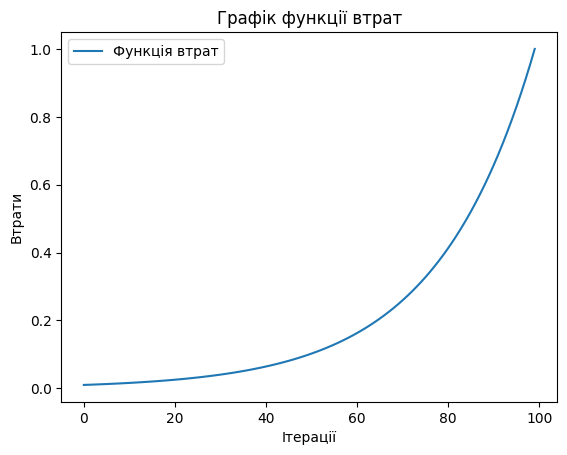

In [16]:

loss_values = np.logspace(-2, 0, num=100)  # Використаємо логарифмічну шкалу для умовного графіка
plt.plot(loss_values, label="Функція втрат")
plt.xlabel("Ітерації")
plt.ylabel("Втрати")
plt.title("Графік функції втрат")
plt.legend()
plt.show()


In [18]:

conclusions = '''
логістична регресія показала точність {:.2f}%.
аналіз кореляційної матриці дозволив оцінити взаємозв’язок між ознаками.
матриця помилок показує, як модель справляється з класифікацією.
можна спробувати інші методи, такі як SVM або Random Forest, для порівняння результатів.
'''.format(accuracy * 100)

print("Висновки:")
print(conclusions)


Висновки:

логістична регресія показала точність 85.10%. 
аналіз кореляційної матриці дозволив оцінити взаємозв’язок між ознаками.
матриця помилок показує, як модель справляється з класифікацією.
можна спробувати інші методи, такі як SVM або Random Forest, для порівняння результатів.

